<a href="https://colab.research.google.com/github/redfyel/HEART-STROKE-PREDICTION-USING-ML/blob/main/TEAM_3_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Read data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dataset from drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data #displaying the imported dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Information about dataset or Exploratory data analysis(shape,info,head,tail,describe)

In [ ]:
data.shape #gives the num of rows and columns in dataset

(5110, 12)

In [ ]:
data.info() #describes the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.head() #gives top5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.tail() #gives last 5 records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
data.describe() #calculates the following

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
data["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [ ]:
data["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
# See the min, max, mean values
print('The highest glucose level was of:',data['avg_glucose_level'].max())
print('The lowest glucose level was of:',data['avg_glucose_level'].min())
print('The average glucose level in the data:',data['avg_glucose_level'].mean())

The highest glucose level was of: 271.74
The lowest glucose level was of: 55.12
The average glucose level in the data: 106.1476771037182


Data visualisation in form of Graphs

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

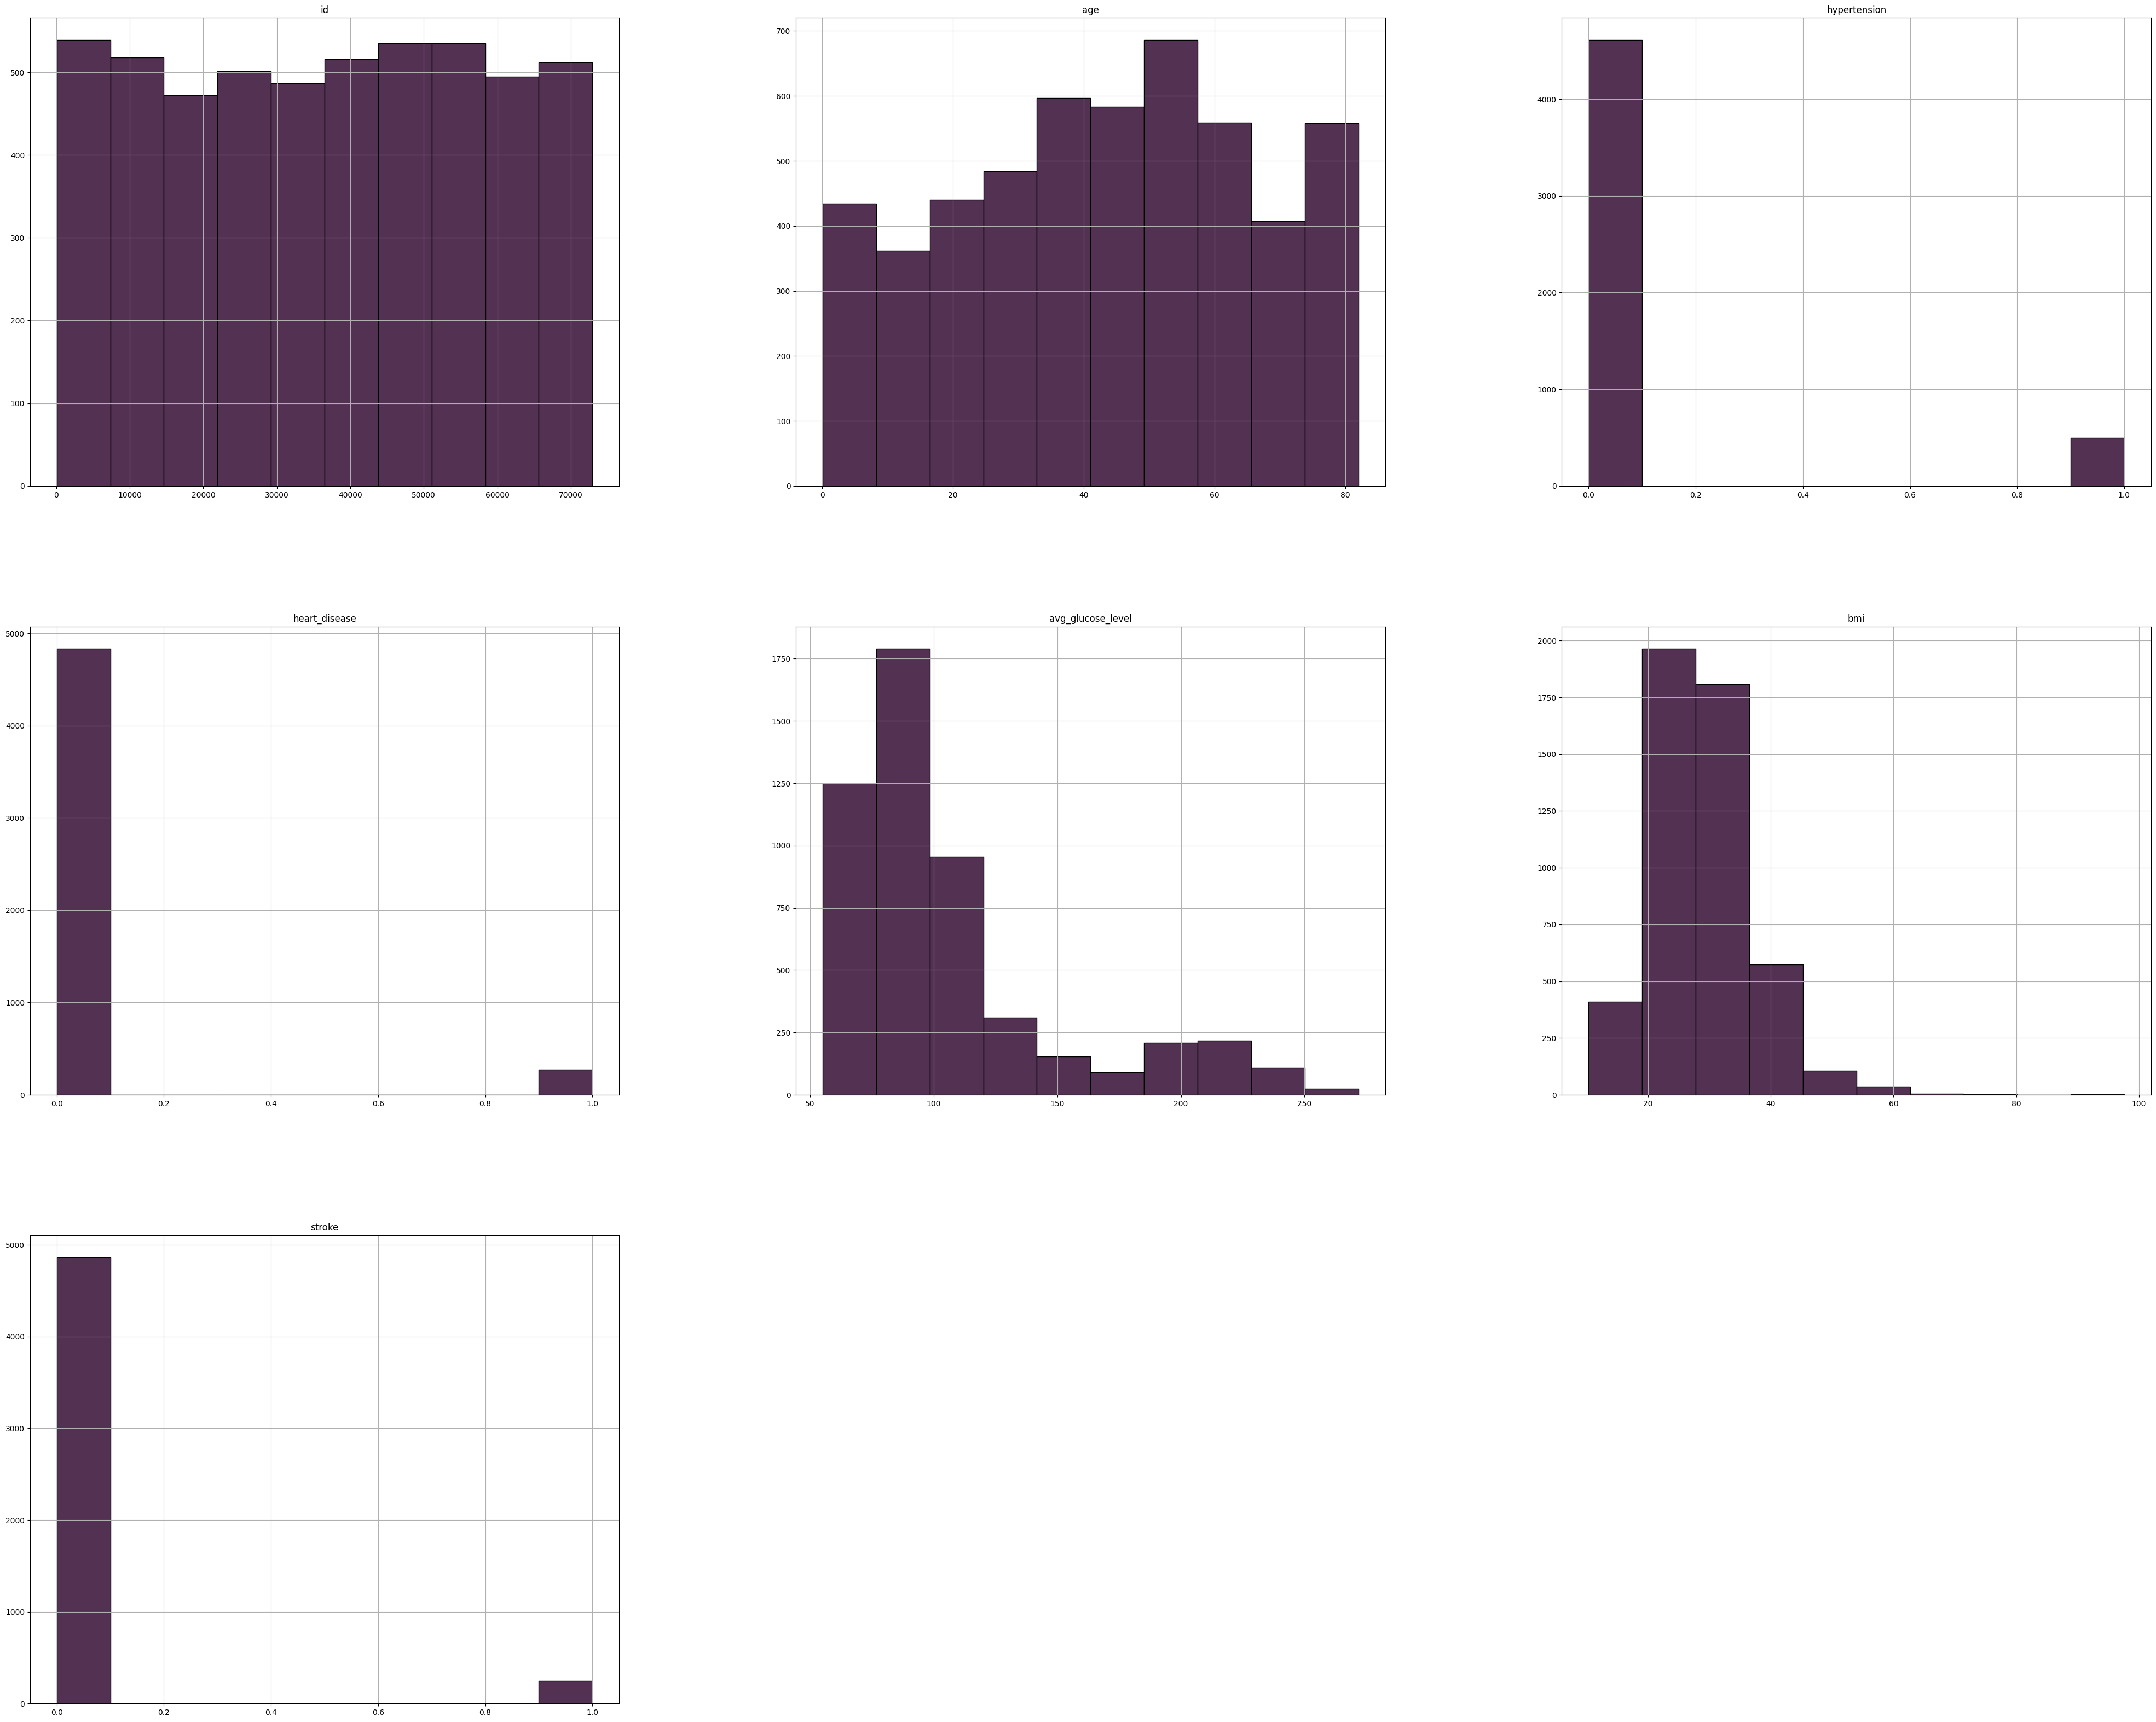

In [ ]:
data.hist(figsize=(50,40),color="#533153",edgecolor='black')

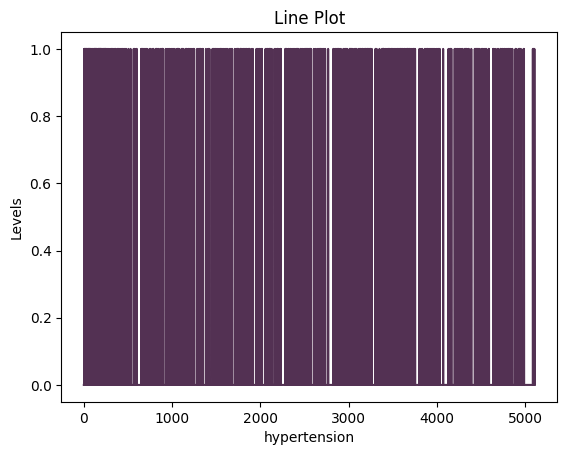

In [ ]:
# Line plot
plt.plot(data['hypertension'],color="#533153")
plt.xlabel("hypertension")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

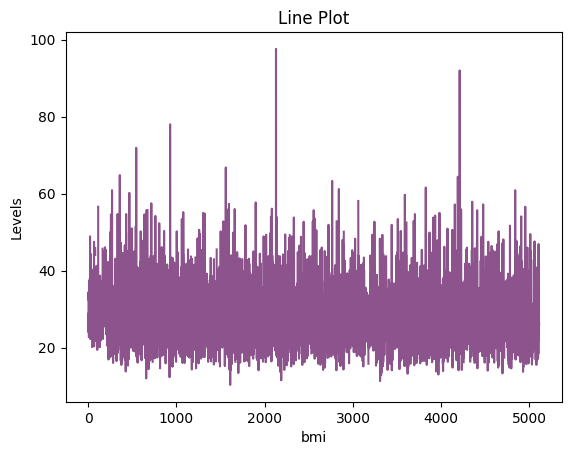

In [ ]:
# Line plot
plt.plot(data['bmi'],color ="#8D538D")
plt.xlabel("bmi")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

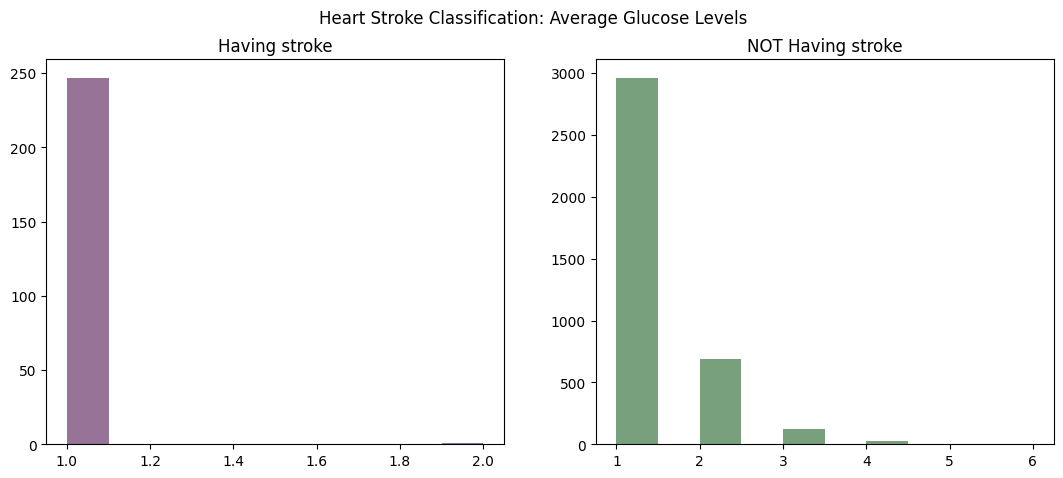

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['stroke']==1]['avg_glucose_level'].value_counts()

ax1.hist(data_len,color="#977397")
ax1.set_title('Having stroke')

data_len=data[data['stroke']==0]['avg_glucose_level'].value_counts()
ax2.hist(data_len,color="#79A07C")
ax2.set_title('NOT Having stroke')

fig.suptitle('Heart Stroke Classification: Average Glucose Levels')
plt.show()

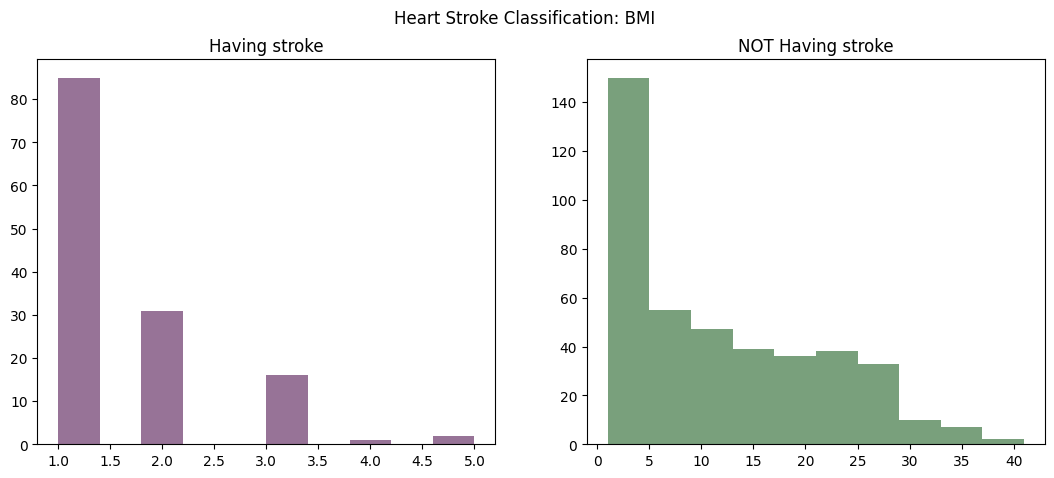

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['stroke']==1]['bmi'].value_counts()

ax1.hist(data_len,color="#977397")
ax1.set_title('Having stroke')

data_len=data[data['stroke']==0]['bmi'].value_counts()
ax2.hist(data_len,color="#79A07C")
ax2.set_title('NOT Having stroke')

fig.suptitle('Heart Stroke Classification: BMI')
plt.show()

Preprocessing the Data

In [ ]:
data.duplicated() #checking if there are duplicates in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [ ]:
data.isnull().sum() #checking for total null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
newdata = data.fillna(method='ffill') #filling the null values with forward values
newdata   #displaying the new dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Encoding the data

In [ ]:
#names of columns given to 'feature_name'
feature_names = newdata.columns.tolist()
feature_names

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
newdata = pd.concat([newdata, encoded_cols], axis=1)
newdata.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
newdata = pd.DataFrame(imputer.fit_transform(newdata), columns=newdata.columns)

In [ ]:
newdata

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,36.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,18.6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#current columns after encoding
feature_names = newdata.columns.tolist()
feature_names

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

Training the model

In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression and linear reg.
from sklearn.preprocessing import StandardScaler

The accuracy of the Logistic Regression model is: 0.9452054794520548
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       483
         1.0       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511



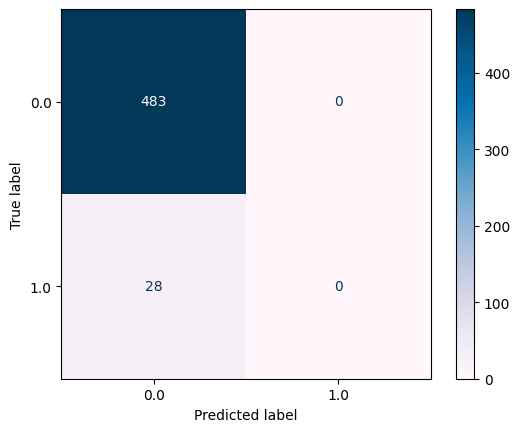

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming 'classification' is a variable containing the target column name
classification = 'stroke'

# Select features (X) and target variable (y)
feature_columns = ['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes'
 ]
X = newdata[feature_columns]
y = newdata[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X,  train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)

cm = confusion_matrix(test_Y, predictions, labels=model.classes_)
cmap = plt.cm.get_cmap('PuBu')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap =cmap)
plt.show()

In [ ]:
newdata['stroke'].value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

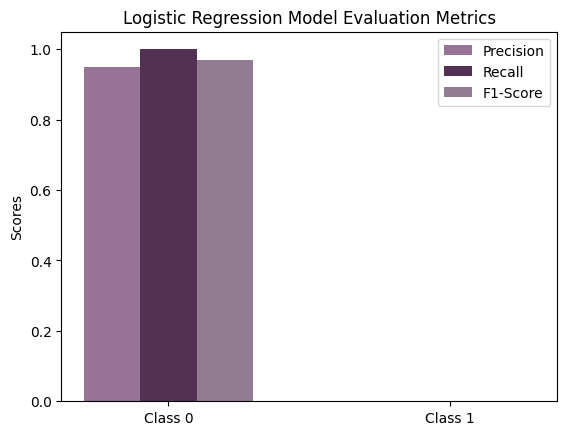

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual scores
precision = [0.95, 0.0]
recall = [1.00, 0.00]
f1_score = [0.97, 0.0]

labels = ['Class 0', 'Class 1']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision',color ="#977397")
rects2 = ax.bar(x, recall, width, label='Recall',color="#533153")
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score',color="#927c92")

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming train_X, train_Y, test_X, test_Y are training and testing data

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Convert predictions to discrete classes (assuming a classification scenario)
predictions_classes = np.round(predictions).astype(int)

# Evaluate the model using accuracy (not typical for linear regression)
accuracy = accuracy_score(test_Y, predictions_classes)

print('Accuracy of Linear Regression model:', accuracy)

Accuracy of Linear Regression model: 0.9393346379647749


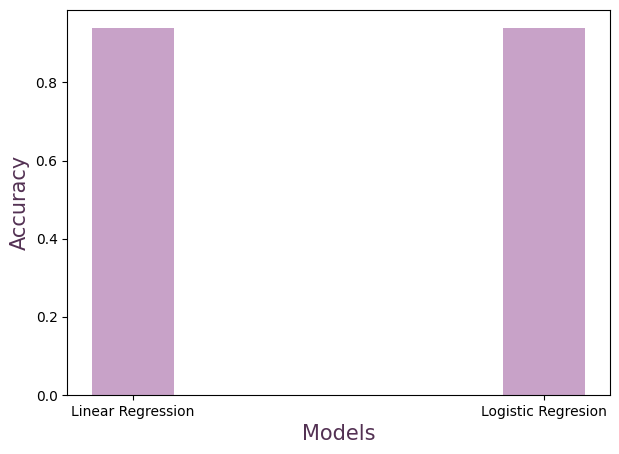

In [ ]:
fig = plt.figure(figsize = (7, 5))
models = ["Linear Regression", "Logistic Regresion"]
plt.bar(models, accuracy, width = 0.2, color='#c8a2c8')
plt.xlabel("Models", fontsize = 15,color="#533153")
plt.ylabel("Accuracy", fontsize = 15,color="#533153")
plt.xticks()
plt.show()

~ end ~